In [17]:
import matplotlib.pyplot as plt
import numpy as np

### Define functions for plotting learning curves, predicted vs. true values, and residuals ###

# Set a consistent plotting style
plt.style.use('seaborn-v0_8-darkgrid')  
plt.rcParams['figure.figsize'] = [10, 6]  # Set a consistent figure size

# Function for plotting learning curves
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation error")

    plt.xlabel('Number of Training Examples')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Learning Curve')
    plt.legend(loc="best")
    plt.show()

# Function for plotting predicted vs. true values
def plot_predicted_vs_true(y_true, y_pred):
    plt.figure()
    scaled_back_y_t =y_true * 1e-11
    scaled_back_y_p =y_pred * 1e-11
    plt.scatter(scaled_back_y_t, scaled_back_y_p, alpha=0.3)
    plt.plot([scaled_back_y_t.min(), scaled_back_y_t.max()], [scaled_back_y_t.min(), scaled_back_y_t.max()], '--r', linewidth=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Predicted vs. True Values')
    plt.show()

# Function for plotting residuals
def plot_residuals(y_true, y_pred):
    scaled_back_y_t =y_true * 1e-11
    scaled_back_y_p =y_pred * 1e-11
    residuals = scaled_back_y_t - scaled_back_y_p
    plt.figure()
    plt.scatter(scaled_back_y_p, residuals, alpha=0.3)
    plt.hlines(y=0, xmin=scaled_back_y_p.min(), xmax=scaled_back_y_p.max(), linestyles='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

In [18]:
import pandas as pd

### EDA ###

# Load data
file_path = r'C:\Users\Bruker\OneDrive - NTNU\Y5\Master_thesis\Idun\MachineLearning\Data\diffusion_coefficients_cp_BinSeg_l1.csv'
df_unfiltered = pd.read_csv(file_path)


# Filter out rows where R^2 is less than 0.90
df = df_unfiltered[df_unfiltered['R^2'] >= 0.90]

"""Can be added for less warnings:

df = df.loc[df['R_squared'] >= 0.90]
df.loc[:, 'Concentration'] = df['Concentration'].astype(str)"""

# Display the first few rows of the data
#print(df.head())

# Display the summary statistics of the data
print(df.describe())

# Check for missing values in the data
#print(df.isnull().sum())

# Calculate the variance of the data
print(df.var())

# Calculate the correlation between the features and the target
print(df.corr())

# Scale the Diffusion Coefficient by 10^11, BUT WE NEED TO CALL THIS TRANSFORMATION IN THE PIPELINE
df['Diffusion Coefficient'] = df['Diffusion Coefficient'] * 1e11

# Calculate the variance of the scaled Diffusion Coefficient

print(df['Diffusion Coefficient'].var())

# Calculate correlation matrix between the numeric feature and the target
corr_matrix = df.corr()
print(corr_matrix.loc['Diffusion Coefficient', 'Temperature'])



       Temperature  Concentration  Diffusion Coefficient         R^2  \
count   913.000000     913.000000           9.130000e+02  913.000000   
mean    307.957954      80.208105           5.248583e-11    0.982678   
std      28.728850      14.336207           4.683504e-11    0.020529   
min     258.000000      66.000000           1.102388e-12    0.900029   
25%     283.225225      66.000000           2.220546e-11    0.976311   
50%     307.749750      75.000000           3.802110e-11    0.990654   
75%     332.774775     100.000000           6.428435e-11    0.996987   
max     358.000000     100.000000           3.702196e-10    0.999904   

           stderr  
count  913.000000  
mean     0.000023  
std      0.000025  
min      0.000001  
25%      0.000009  
50%      0.000016  
75%      0.000027  
max      0.000213  
Temperature              8.253468e+02
Concentration            2.055268e+02
Diffusion Coefficient    2.193521e-21
R^2                      4.214579e-04
stderr             

C:\Users\Bruker\AppData\Local\Temp\ipykernel_6324\330251406.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diffusion Coefficient'] = df['Diffusion Coefficient'] * 1e11


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd


#### PREPROCESSING ####

# Convert 'Concentration' to string to ensure it's treated as categorical
df['Concentration'] = df['Concentration'].astype(str)

# Split data into 80% training and 20% test
X = df[['Concentration', 'Temperature']]
y = df['Diffusion Coefficient']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define preprocessing for numeric columns (scale them)
numeric_features = ['Temperature']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = ['Concentration']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

C:\Users\Bruker\AppData\Local\Temp\ipykernel_6324\1442899044.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Concentration'] = df['Concentration'].astype(str)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Model R^2 Score: -0.043246425335925265


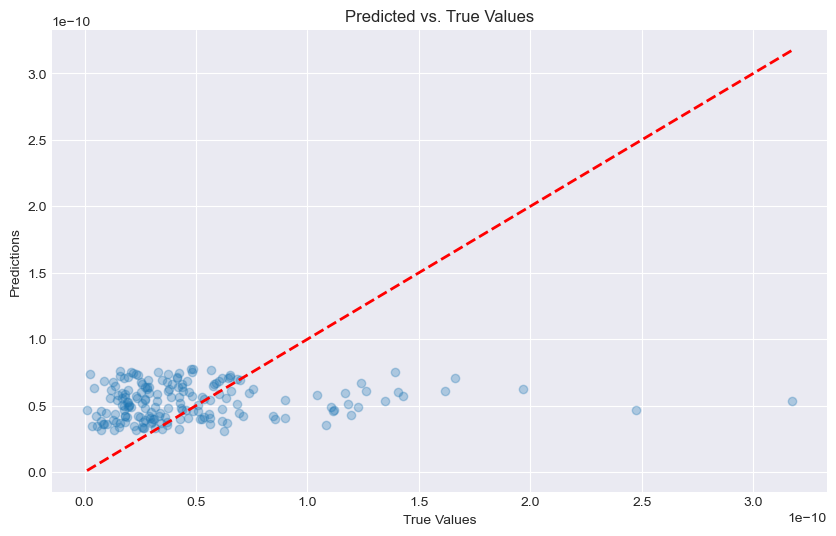

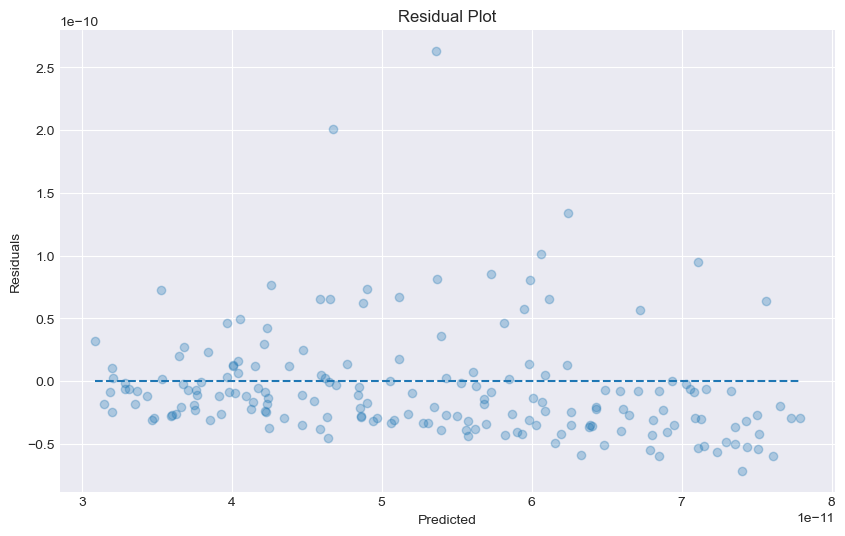

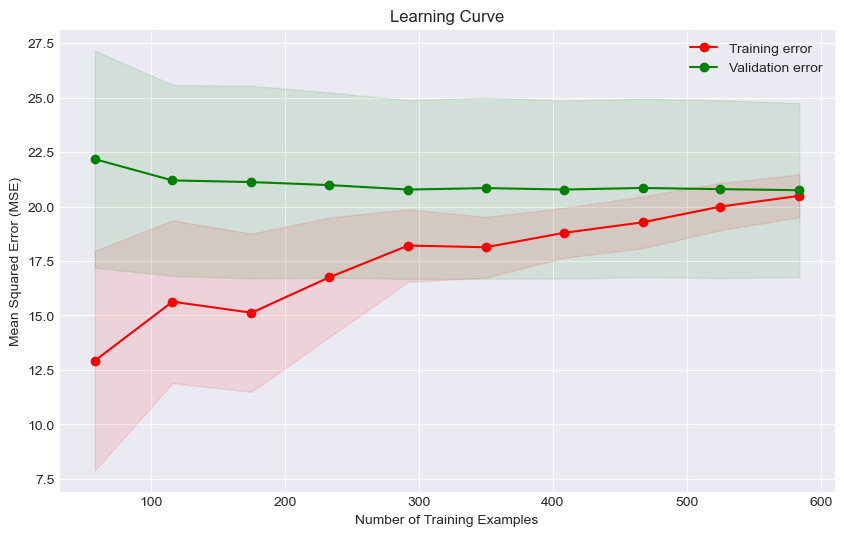

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

### RIDGE REGRESSION ###

# Create a preprocessing and modelling pipeline with Ridge regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge())])



# Define hyperparameter space
param_grid = {
    'regressor__alpha': np.logspace(-4, 4, 20)
}

# Setup the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print(f"Best Model R^2 Score: {r2}")

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model, 
    X=X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)

# Plotting Prediction vs True Value with Scaled Axes
plot_predicted_vs_true(y_test, y_pred)
# Residuals Plot 
plot_residuals(y_test, y_pred)

# Plot Learning Curve
plot_learning_curve(train_sizes, train_scores, validation_scores)

Best parameters found:  {'regressor__bootstrap': True, 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
R^2 Score with Best Model: -0.18792068730798928


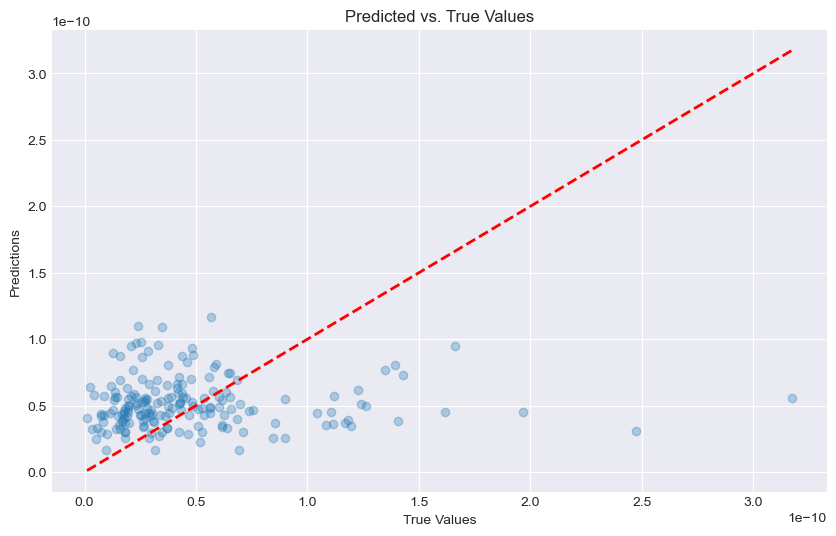

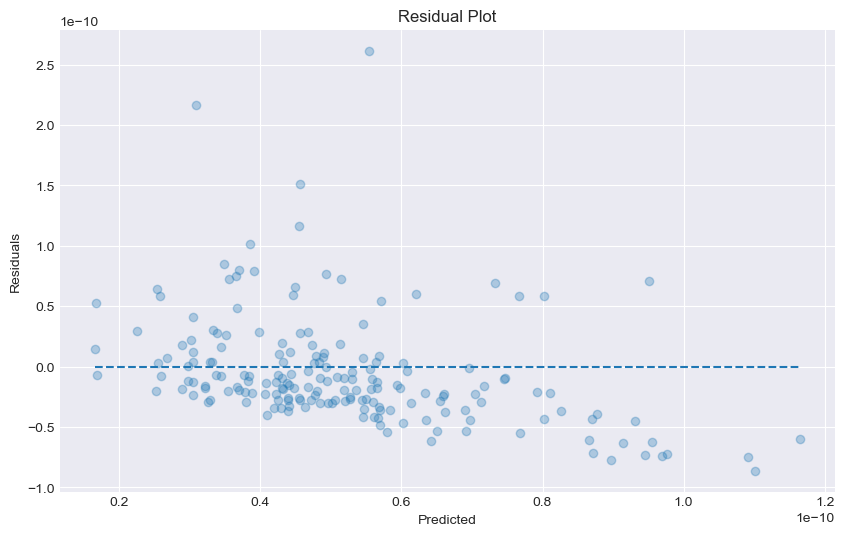

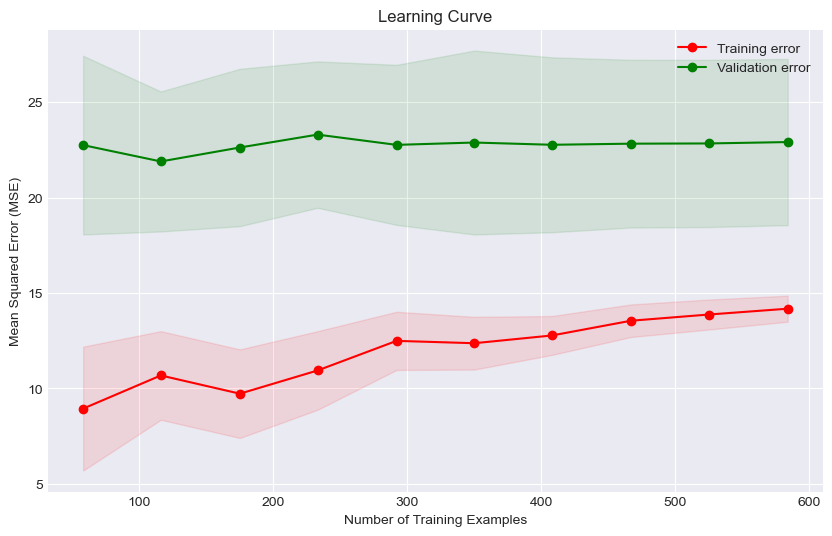

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
import numpy as np

### RANDOM FOREST REGRESSOR ###

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=0))])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 4, 6],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

# Instantiate the Grid Search model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score with Best Model: {r2}")

# Learning Curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1)

# Plotting Prediction vs True Value with Scaled Axes
plot_predicted_vs_true(y_test, y_pred)

# Residuals Plot 
plot_residuals(y_test, y_pred)

# Plot Learning Curve
plot_learning_curve(train_sizes, train_scores, validation_scores)

Best parameters found:  {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}
R^2 Score with Best Model: -0.04281710079943535
Mean Squared Error with Best Model: 19.205538494589156


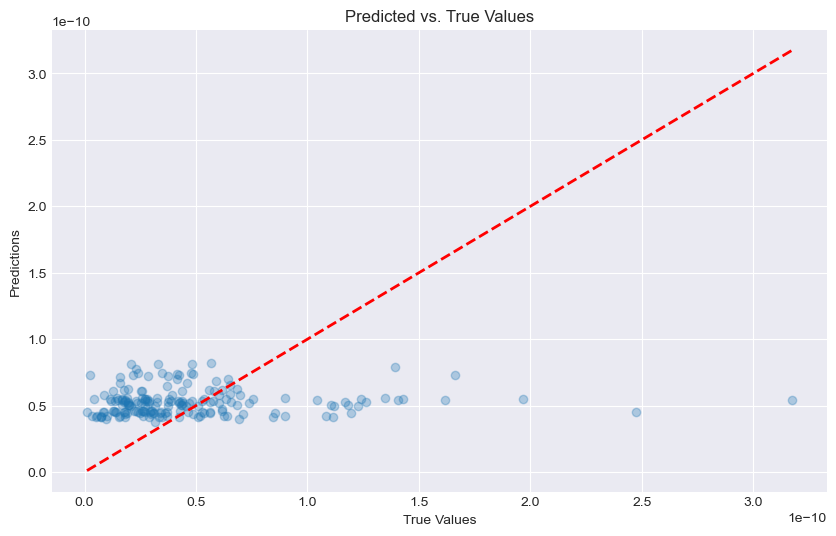

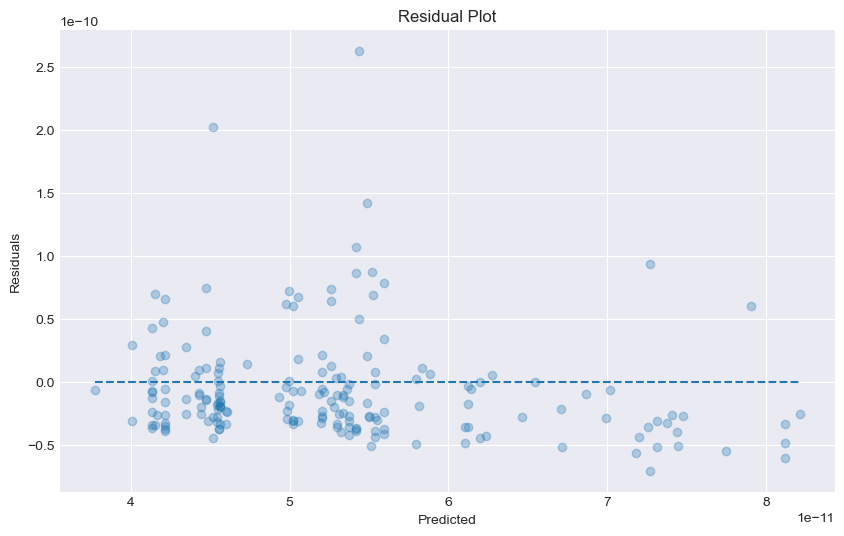

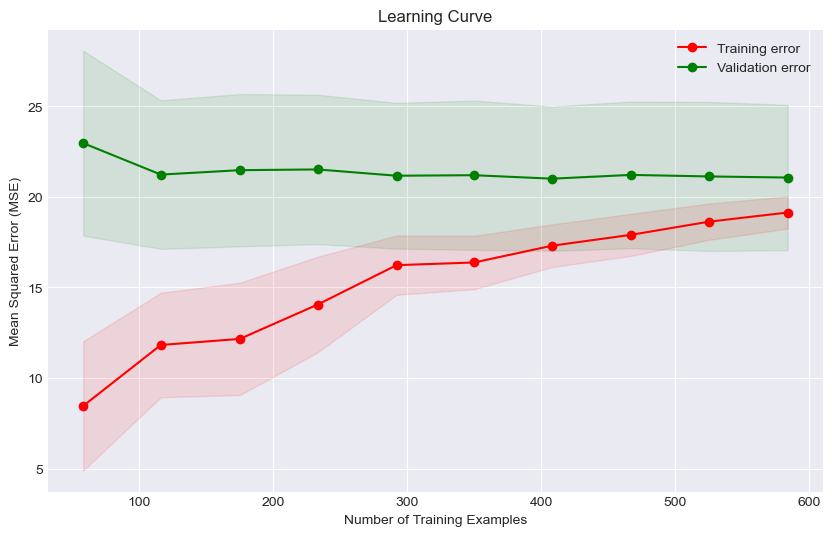

In [7]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

### XGBOOST REGRESSOR ###

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=0))])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 6, 9],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8, 0.9, 1.0]
}

# Instantiate the Grid Search model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2 Score with Best Model: {r2}")
print(f"Mean Squared Error with Best Model: {mse}")

# Learning Curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1)

# Plotting Prediction vs True Value with Scaled Axes
plot_predicted_vs_true(y_test, y_pred)

# Residuals Plot 
plot_residuals(y_test, y_pred)

# Plot Learning Curve
plot_learning_curve(train_sizes, train_scores, validation_scores)

Reloading Tuner from my_dir\keras_tuning\tuner0.json
Epoch 1/100
19/19 [==============================] - 0s 9ms/step - loss: 19.8063 - mean_squared_error: 19.8063 - val_loss: 23.2772 - val_mean_squared_error: 23.2772
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 19.6689 - mean_squared_error: 19.6689 - val_loss: 23.4256 - val_mean_squared_error: 23.4256
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 19.5465 - mean_squared_error: 19.5465 - val_loss: 23.0810 - val_mean_squared_error: 23.0810
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 19.6148 - mean_squared_error: 19.6148 - val_loss: 23.0559 - val_mean_squared_error: 23.0559
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 19.6628 - mean_squared_error: 19.6628 - val_loss: 23.1101 - val_mean_squared_error: 23.1101
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 19.5715 - mean_squared_error: 19.5715 - val_loss:

C:\Users\Bruker\AppData\Local\Temp\ipykernel_6324\706995689.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_model_wrapped = KerasRegressor(build_fn=build_best_model, epochs=100, batch_size=32, verbose=0)


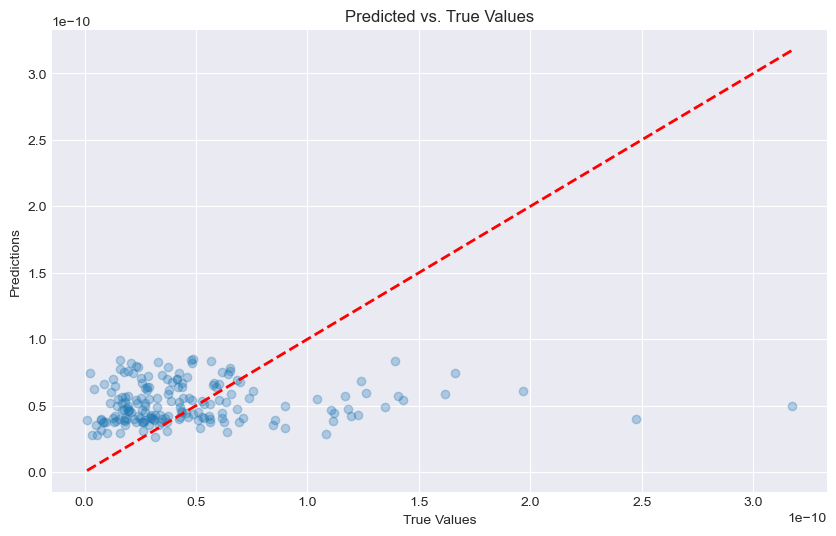

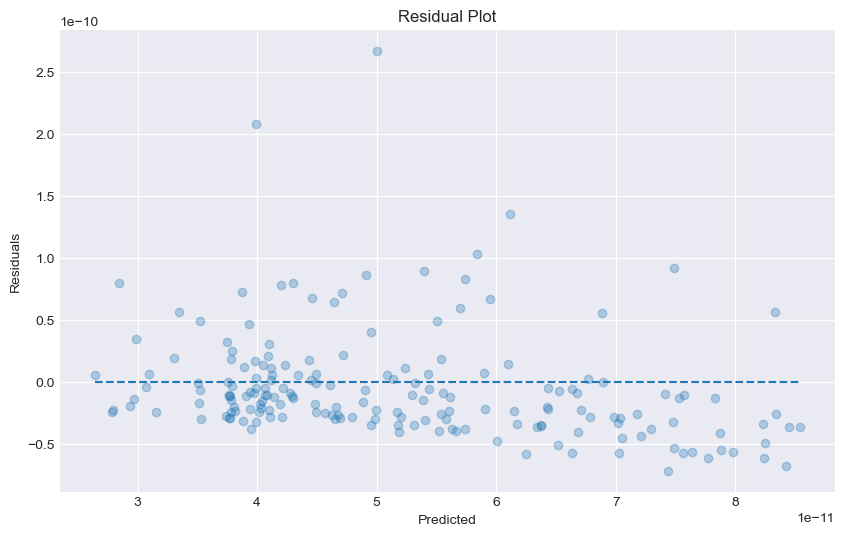

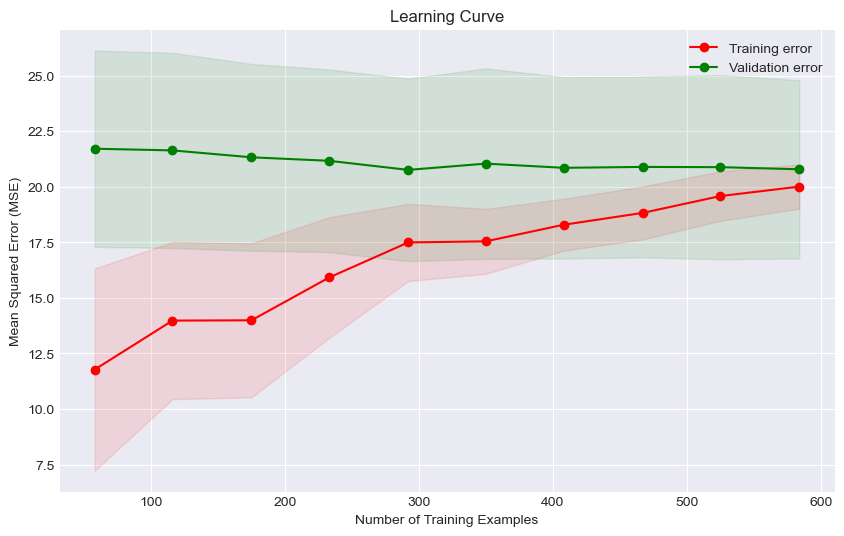

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


### MLP REGRESSOR ###

# apply the preprocessing steps to the training data
X_train_MLP = preprocessor.fit_transform(X_train)
# apply the preprocessing steps to the test data
X_test_MLP = preprocessor.transform(X_test)

# Step 1: Model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=10, max_value=100, step=10),
                           #activation=hp.Choice('activation', ['relu', 'tanh']),
                           activation='relu',
                           input_dim=4,))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    return model

# Step 2: Configure the tuner
tuner = RandomSearch(
    build_model,
    objective='mean_squared_error',
    max_trials=50,  # Adjust based on your computational budget
    executions_per_trial=1,  # How many models to build for each trial
    directory='my_dir',  # Directory to save logs and models
    project_name='keras_tuning'
)

# Step 3: Run the tuner
tuner.search(X_train_MLP, y_train, epochs=10, validation_split=0.2)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]



# Retrain this model on the full dataset or evaluate it on a test set

history = best_model.fit(X_train_MLP, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[EarlyStopping(patience=10)])

def build_best_model():

    # Clone the model architecture
    model_clone = keras.models.clone_model(best_model)
    # Compile the cloned model with the same configuration as the best_model
    model_clone.compile(optimizer=best_model.optimizer,
                        loss='mean_squared_error',
                        metrics=['mean_squared_error'])
    # Copy the weights from the best_model
    model_clone.set_weights(best_model.get_weights())
    return model_clone

# Wrap the function with KerasRegressor
best_model_wrapped = KerasRegressor(build_fn=build_best_model, epochs=100, batch_size=32, verbose=0)

# For predicted vs. true values and residuals, use your test set or validation set
y_pred = best_model.predict(X_test_MLP)
y_pred = y_pred.flatten()  # Flatten to match shape of y_test, only when not wrapping in KearsRegressor

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_model_wrapped, 
    X=X_train_MLP,
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=1
)
# Plotting Prediction vs True Value with Scaled Axes
plot_predicted_vs_true(y_test, y_pred)

# Residuals Plot 
plot_residuals(y_test, y_pred)

# Plot Learning Curve
plot_learning_curve(train_sizes, train_scores, validation_scores)